# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [82]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [84]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [85]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [86]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [87]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

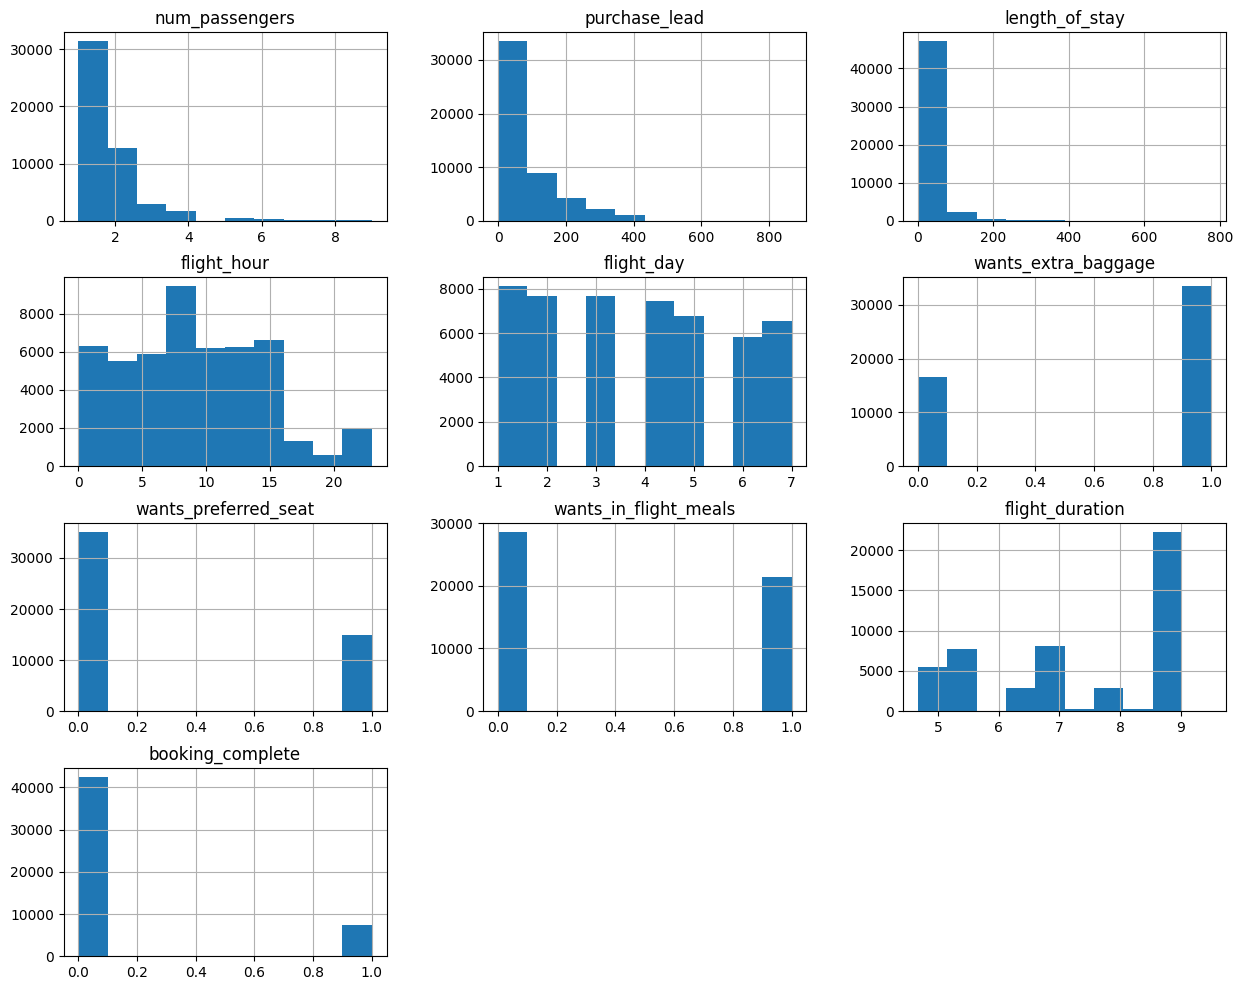

In [88]:
df.hist(figsize=(15,12));

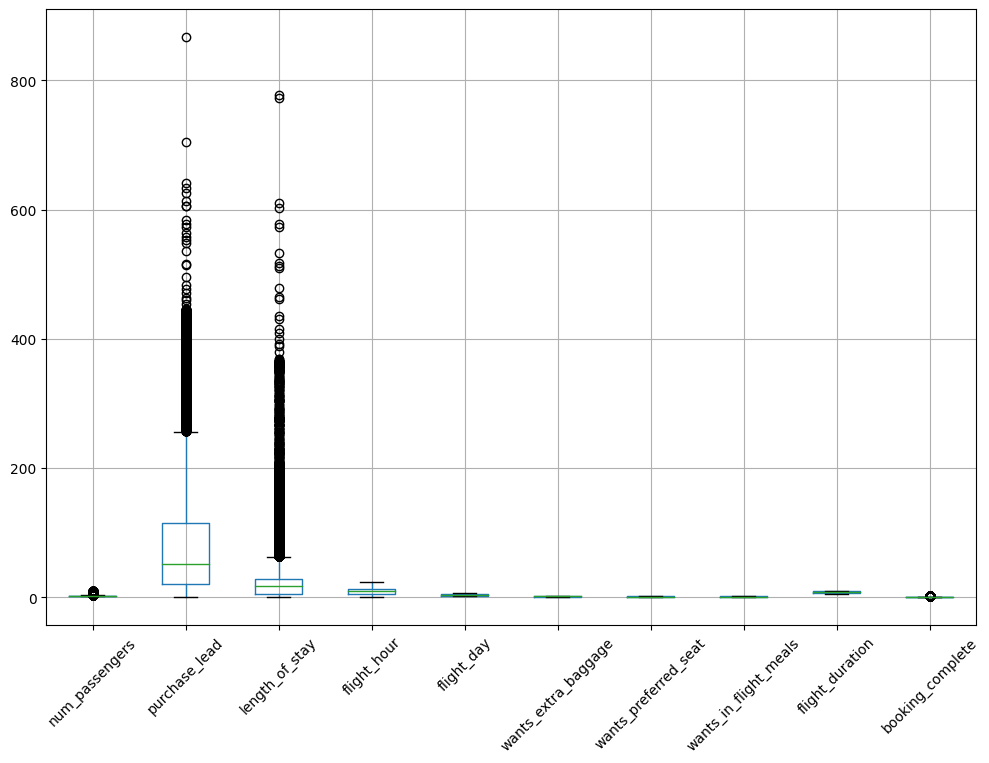

In [89]:
df.boxplot(figsize=(12,8), )
# Rotate x-axis labels
plt.xticks(rotation=45);

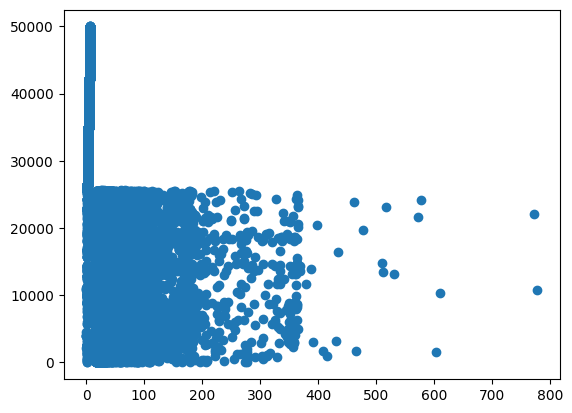

In [90]:
plt.scatter(df.length_of_stay, df.index);

In [91]:
df.length_of_stay.describe()

count    50000.00000
mean        23.04456
std         33.88767
min          0.00000
25%          5.00000
50%         17.00000
75%         28.00000
max        778.00000
Name: length_of_stay, dtype: float64

In [92]:
df[df.length_of_stay > 400].shape[0]

17

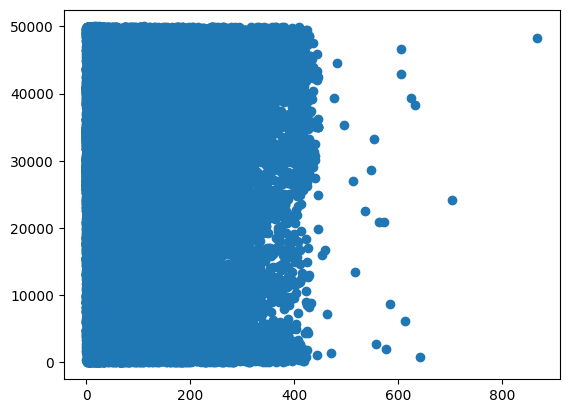

In [93]:
plt.scatter(df.purchase_lead, df.index);

In [94]:
df[df.purchase_lead >500].shape[0]

18

In [95]:
df.purchase_lead.describe()

count    50000.000000
mean        84.940480
std         90.451378
min          0.000000
25%         21.000000
50%         51.000000
75%        115.000000
max        867.000000
Name: purchase_lead, dtype: float64

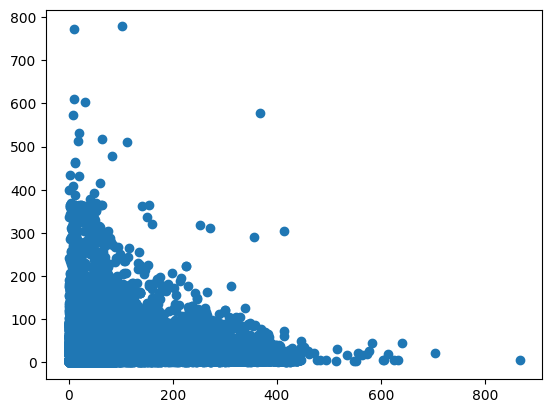

In [96]:
plt.scatter(df.purchase_lead, df.length_of_stay);

In [97]:
df.sales_channel.unique()

array(['Internet', 'Mobile'], dtype=object)

In [98]:
df.trip_type.unique()


array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [99]:
df.route.unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [100]:
df.booking_origin.unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

#### Data Cleaning

In [101]:
# Extract departure and arrival codes
df['departure'] = df['route'].str[:3]
df['arrival'] = df['route'].str[3:]


In [102]:
df.head(20)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,departure,arrival
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,AKL,DEL
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,AKL,DEL
5,1,Internet,RoundTrip,3,48,20,4,AKLDEL,New Zealand,1,0,1,5.52,0,AKL,DEL
6,3,Internet,RoundTrip,201,33,6,4,AKLDEL,New Zealand,1,0,1,5.52,0,AKL,DEL
7,2,Internet,RoundTrip,238,19,14,1,AKLDEL,India,1,0,1,5.52,0,AKL,DEL
8,1,Internet,RoundTrip,80,22,4,1,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL
9,1,Mobile,RoundTrip,378,30,12,7,AKLDEL,India,0,0,0,5.52,0,AKL,DEL


In [103]:
df.departure.unique()

array(['AKL', 'AOR', 'BBI', 'BDO', 'BKI', 'BLR', 'BOM', 'BTJ', 'BTU',
       'BWN', 'CAN', 'CCU', 'CEB', 'CGK', 'CKG', 'CMB', 'CNX', 'COK',
       'CRK', 'CSX', 'CTS', 'CTU', 'CXR', 'DAC', 'DAD', 'DEL', 'DMK',
       'DPS', 'GOI', 'HAN', 'HDY', 'HGH', 'HKG', 'HKT', 'HND', 'HYD',
       'ICN', 'IKA', 'JED', 'JHB', 'JOG', 'KBR', 'KBV', 'KCH', 'KHH',
       'KIX', 'KLO', 'KNO', 'KOS', 'KTM', 'KWL', 'LBU', 'LGK', 'LOP',
       'LPQ', 'MAA', 'MEL', 'MFM', 'MLE', 'MNL', 'MRU', 'MYY', 'NRT',
       'OOL', 'PEK', 'PEN', 'PER', 'PNH', 'PNK', 'PUS', 'PVG', 'REP',
       'RGN', 'SBW', 'SDK', 'SGN', 'SIN', 'SRG', 'SUB', 'SYD', 'TGG',
       'TPE', 'TRZ', 'TWU', 'URT'], dtype=object)

In [104]:
df.arrival.unique()

array(['DEL', 'HGH', 'HND', 'ICN', 'KIX', 'KTM', 'KUL', 'MRU', 'PEK',
       'PVG', 'TPE', 'MEL', 'OOL', 'PER', 'SYD', 'CTS', 'CTU', 'IKA',
       'PUS', 'XIY', 'CKG', 'JED', 'WUH', 'COK', 'DPS', 'JHB', 'KCH',
       'LOP', 'MAA', 'MYY', 'PEN', 'PNH', 'SBW', 'SIN', 'SUB', 'TGG',
       'TRZ', 'TWU', 'DMK', 'HKT', 'KBR', 'KNO', 'LGK', 'SGN', 'KBV',
       'HKG', 'JOG', 'MFM', 'MNL', 'SZX', 'MLE', 'REP', 'RGN', 'SDK',
       'VTZ', 'PDG', 'URT', 'SWA', 'UTP', 'VTE', 'LPQ', 'LBU', 'NRT',
       'SRG'], dtype=object)

In [105]:
# Initialize LabelEncoder for the categorical columns
le_departure = LabelEncoder()
le_arrival = LabelEncoder()
le_sales_channel = LabelEncoder()
le_trip_type = LabelEncoder()
le_booking_origin = LabelEncoder()

In [106]:
# Fit and transform the categorical features
df['sales_channel_encoded'] = le_departure.fit_transform(df['sales_channel'])
df['trip_type_encoded'] = le_arrival.fit_transform(df['trip_type'])
df['booking_origin_encoded'] = le_departure.fit_transform(df['booking_origin'])
df['departure_encoded'] = le_departure.fit_transform(df['departure'])
df['Arrival_encoded'] = le_arrival.fit_transform(df['arrival'])


In [107]:
df.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,wants_in_flight_meals,flight_duration,booking_complete,departure,arrival,sales_channel_encoded,trip_type_encoded,booking_origin_encoded,departure_encoded,Arrival_encoded
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,...,1,5.62,0,PER,PNH,0,2,4,66,40
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,...,0,5.62,0,PER,PNH,0,2,4,66,40
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,...,1,5.62,0,PER,PNH,0,2,4,66,40
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,...,1,5.62,0,PER,PNH,0,2,4,66,40
49999,1,Internet,RoundTrip,19,6,10,4,PERPNH,Australia,0,...,0,5.62,0,PER,PNH,0,2,4,66,40


In [108]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'departure', 'arrival', 'sales_channel_encoded', 'trip_type_encoded',
       'booking_origin_encoded', 'departure_encoded', 'Arrival_encoded'],
      dtype='object')

In [109]:
encoded_df = df[['num_passengers', 'purchase_lead','length_of_stay', 'flight_hour', 
                'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
                'wants_in_flight_meals', 'flight_duration',
                'sales_channel_encoded', 'trip_type_encoded', 'booking_origin_encoded', 
                'departure_encoded', 'Arrival_encoded', 'booking_complete']]

encoded_df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_encoded,trip_type_encoded,booking_origin_encoded,departure_encoded,Arrival_encoded,booking_complete
0,2,262,19,7,6,1,0,0,5.52,0,2,61,0,4,0
1,1,112,20,3,6,0,0,0,5.52,0,2,61,0,4,0
2,2,243,22,17,3,1,1,0,5.52,0,2,36,0,4,0
3,1,96,31,4,6,0,0,1,5.52,0,2,61,0,4,0
4,2,68,22,15,3,1,0,1,5.52,0,2,36,0,4,0


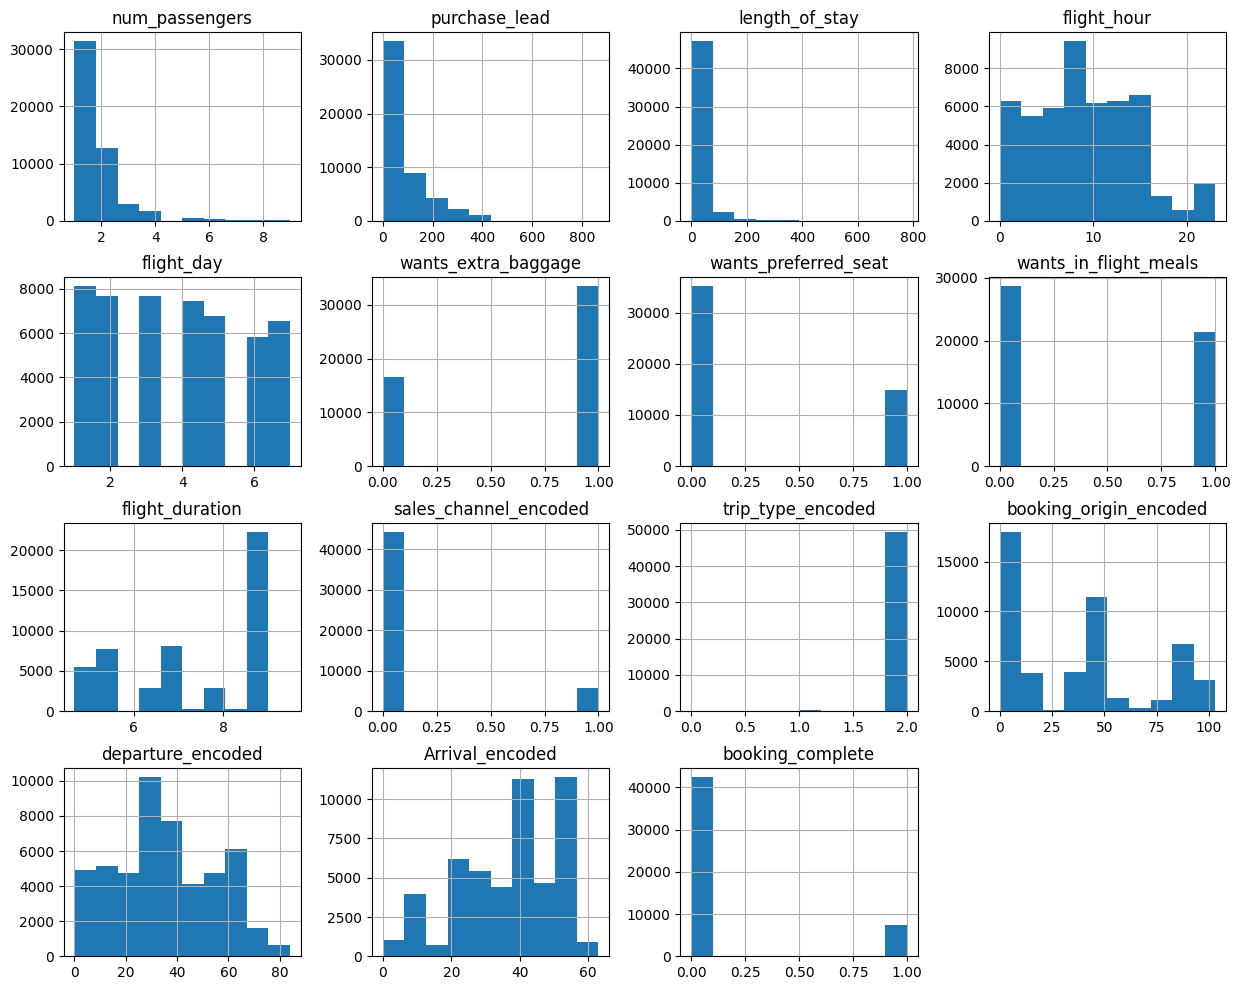

In [110]:
encoded_df.hist(figsize=(15,12));

In [111]:
encoded_df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_encoded,trip_type_encoded,booking_origin_encoded,departure_encoded,Arrival_encoded,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.112360,1.987620,38.263340,35.090460,36.581420,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.315812,0.129873,32.756539,20.316208,14.466008,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000,2.000000,4.000000,20.000000,28.000000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000,2.000000,37.000000,33.000000,39.000000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000,2.000000,57.000000,55.000000,50.000000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000,2.000000,103.000000,84.000000,63.000000,1.000000


In [112]:
encoded_df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

#### Model Training and Prediction

In [113]:
from sklearn.model_selection import train_test_split

# Prepare data
X = encoded_df.drop(columns=['booking_complete'])
y = encoded_df['booking_complete']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize modely
model = LogisticRegression(max_iter=100000)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation

print(f"Logistic Regression Accuracy: {cv_scores.mean()} ± {cv_scores.std()}")


Logistic Regression Accuracy: 0.8496285714285714 ± 0.00011428571428573896


In [115]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation

print(f"Random Forest Accuracy: {cv_scores.mean()} ± {cv_scores.std()}")


Random Forest Accuracy: 0.8499142857142857 ± 0.0021882804730133207


In [116]:
import xgboost as xgb

# Initialize model
model = xgb.XGBClassifier(eval_metric='logloss')

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation

print(f"XGBoost Accuracy: {cv_scores.mean()} ± {cv_scores.std()}")


XGBoost Accuracy: 0.8455428571428572 ± 0.0016096646881146514


Hyperparameter Tuning

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [118]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}


In [119]:
# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\clain\anaconda3\envs\python_DS_train\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\clain\anaconda3\envs\python_DS_train\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\clain\anaconda3\envs\python_DS_train\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\clain\anaconda3\envs\python_DS_train\Lib\site-packages\sklearn\base.py", line 666, in _validate_params

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [120]:
# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_}")

# Predict on the test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.851657142857143
Test Accuracy: 0.8531333333333333


In [121]:
importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                   Feature  Importance
1            purchase_lead    0.169480
11  booking_origin_encoded    0.136809
3              flight_hour    0.122438
2           length_of_stay    0.119108
12       departure_encoded    0.106451
4               flight_day    0.081659
13         Arrival_encoded    0.081608
8          flight_duration    0.065279
0           num_passengers    0.043590
7    wants_in_flight_meals    0.022541
6     wants_preferred_seat    0.018858
5      wants_extra_baggage    0.018624
9    sales_channel_encoded    0.012655
10       trip_type_encoded    0.000903


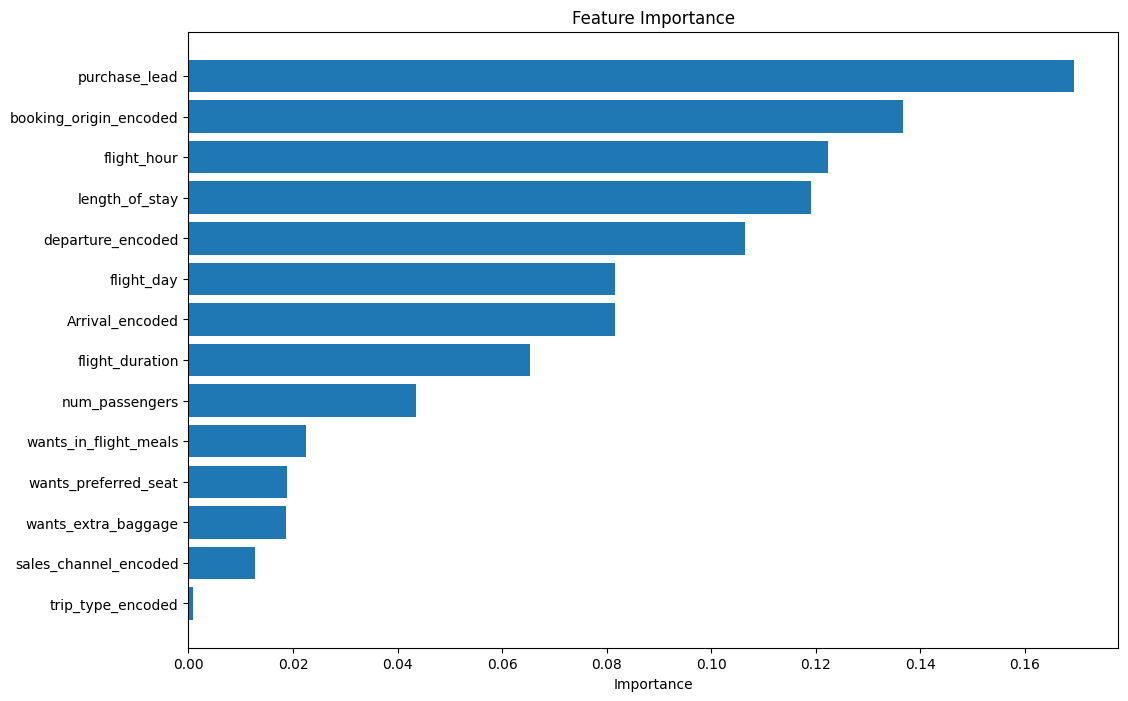

In [122]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()
